In [3]:
import numpy as np 
import pandas as pd 
import re
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
data = pd.read_csv("/content/bank.csv")
data

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."
...,...
4516,"33;""services"";""married"";""secondary"";""no"";-333;..."
4517,"57;""self-employed"";""married"";""tertiary"";""yes"";..."
4518,"57;""technician"";""married"";""secondary"";""no"";295..."
4519,"28;""blue-collar"";""married"";""secondary"";""no"";11..."


In [5]:
# creating list of column names in colmns variable
colmns = re.sub(";", " ", data.columns[0])
colmns = re.sub("\"", "", colmns)
colmns = colmns.split()

# cleaning each row of data 
def clean_data(row):
    row = re.sub(";", " ", row)
    row = re.sub("\"", "", row)
    row = row.split()
    return row

data1 = data.copy()
data1.iloc[:,0] = data1.iloc[:,0].map(lambda x: clean_data(x))
data1

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"[30, unemployed, married, primary, no, 1787, n..."
1,"[33, services, married, secondary, no, 4789, y..."
2,"[35, management, single, tertiary, no, 1350, y..."
3,"[30, management, married, tertiary, no, 1476, ..."
4,"[59, blue-collar, married, secondary, no, 0, y..."
...,...
4516,"[33, services, married, secondary, no, -333, y..."
4517,"[57, self-employed, married, tertiary, yes, -3..."
4518,"[57, technician, married, secondary, no, 295, ..."
4519,"[28, blue-collar, married, secondary, no, 1137..."


In [6]:
# creating columns from "columns" list which we created above and filling values from row lists
idx = 0
for row in data1.iloc[:,0]:
    if len(row) == 17:
        i = 0
        for col in colmns:
            data1.loc[idx,col] = row[i]
            i += 1
    idx += 1
    
data1.drop(data1.columns[0], axis=1, inplace=True)
df = data1.copy()
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [7]:
# converting datatypes of numerical varaibles which were object dtypes
convert_dtype = {"age":int, "balance":int, "day":int, "duration":int, "campaign":int, "pdays":int, "previous":int }
df = df.astype(convert_dtype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


The classification goal is to predict if the client will subscribe a term deposit (variable y).


In [9]:
import missingno as msno
     

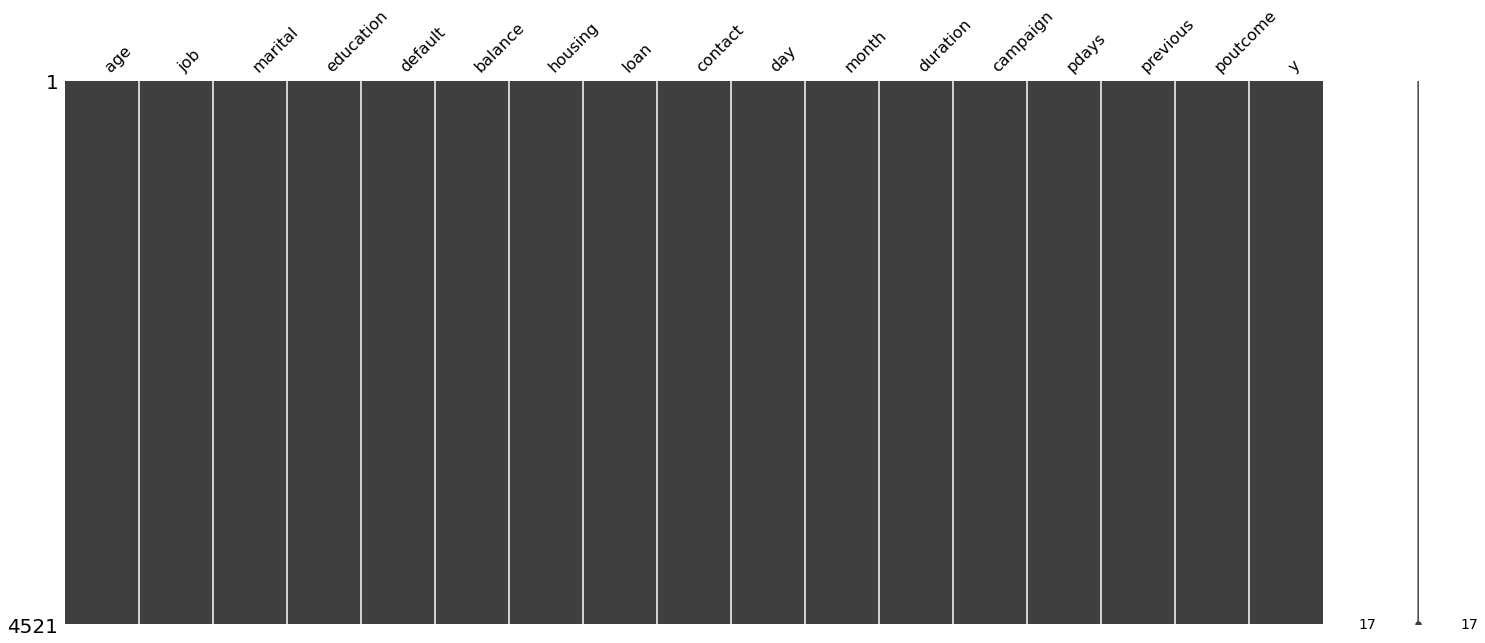

In [10]:
msno.matrix(df)
     

In [11]:
# Check the descriptive statistics of numeric variables
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


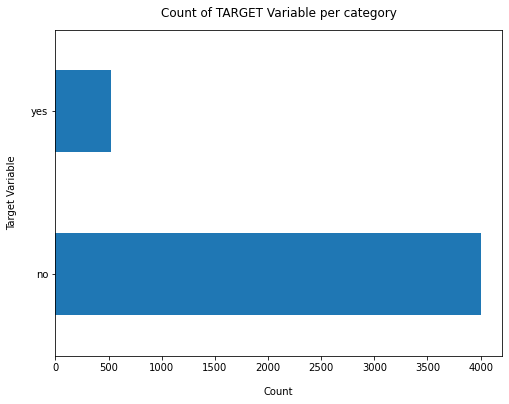

In [12]:
df['y'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [13]:
100*df['y'].value_counts()/len(df['y'])

no     88.476001
yes    11.523999
Name: y, dtype: float64

In [14]:
df['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

Data is highly imbalanced, ratio = 88:11
So we analyse the data with other features while taking the target values separately to get some insights.

Data Exploration
1. Plot distibution of individual predictors by target variables

Univariate Analysis

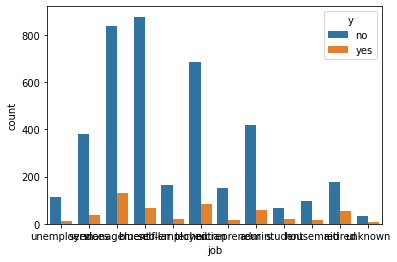

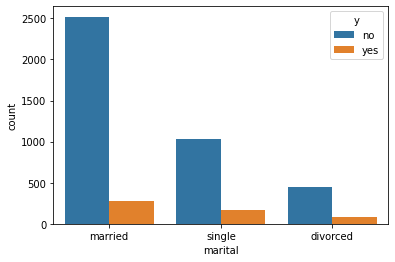

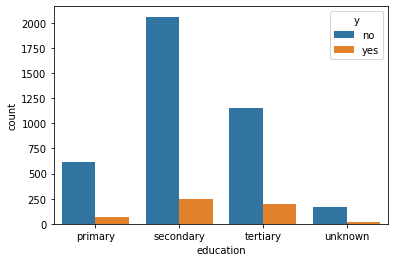

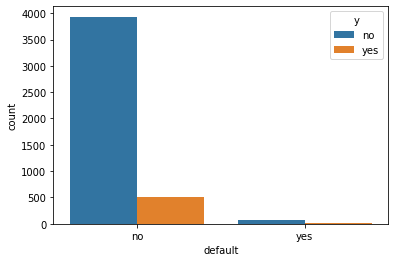

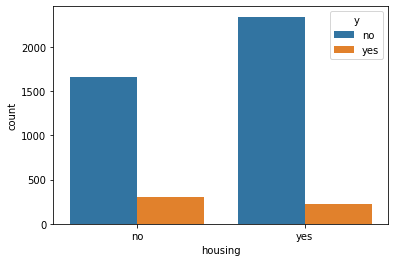

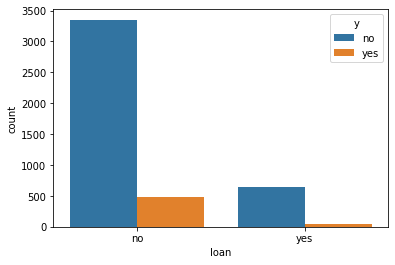

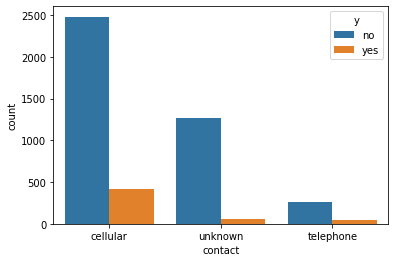

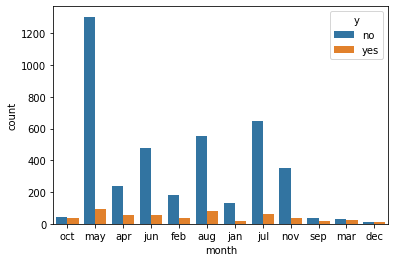

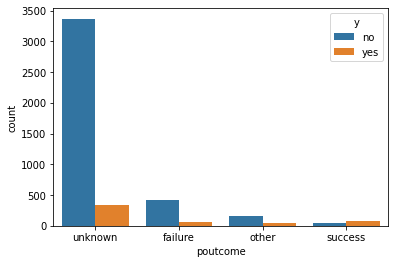

In [15]:
for i, predictor in enumerate(df.drop(columns=['y','age',	'balance','day'	,'duration','campaign','pdays','previous'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='y')

In [16]:
#segregating numerical columns
numerical_f=df.drop(['y'],axis=1).select_dtypes(include=np.number).columns

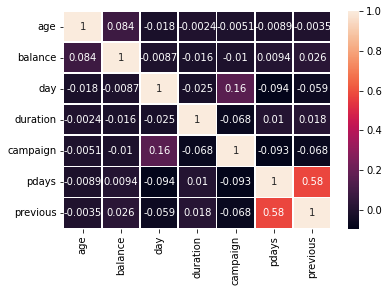

In [17]:
corr=df[numerical_f].corr()
sns.heatmap(corr, annot=True,linewidths=.8)

the featues 'pdays' and 'previous' are moderatily collinear.
since correlation for all variables is < 0.7 hence no 2 columns are multicollinear

Convert the target variable 'y' in a binary numeric variable i.e. Yes=1 ; No = 0

In [18]:
df['y'] = np.where(df.y =='yes',1,0)

Convert all the categorical variables into dummy variables

In [20]:
data_dummies = pd.get_dummies(df)
data_dummies.head(10)

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
5,35,747,23,141,2,176,3,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,36,307,14,341,1,330,2,0,0,0,...,0,0,1,0,0,0,0,1,0,0
7,39,147,6,151,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
8,41,221,14,57,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9,43,-88,17,313,1,147,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0


 Relationship between Pdays and Previous

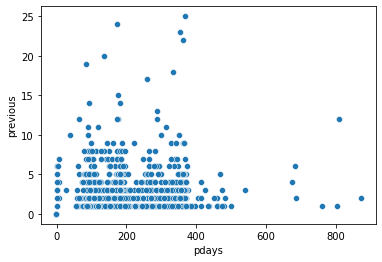

In [21]:
sns.scatterplot(data=data_dummies, x='pdays', y='previous')

Text(0.5, 1.0, 'pdays by churn')

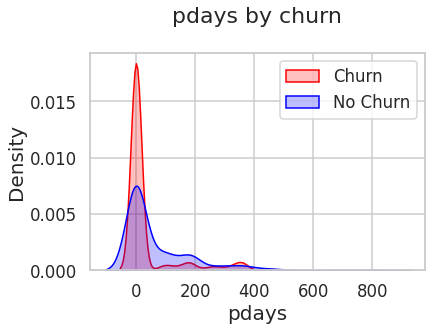

In [34]:
Mth = sns.kdeplot(data_dummies.pdays[(data_dummies["y"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(data_dummies.pdays[(data_dummies["y"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["Churn","No Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('pdays')
Mth.set_title('pdays by churn')

Text(0.5, 1.0, 'pdays by churn')

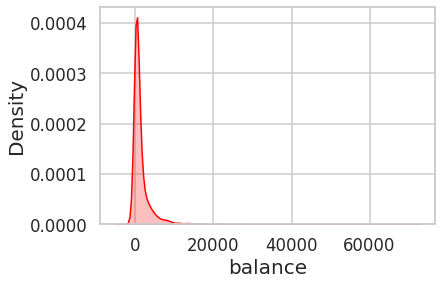

In [44]:
tot = sns.kdeplot(data_dummies.balance[(data_dummies["y"] == 0) ],
                color="Red", shade = True)
tot = sns.kdeplot(data_dummies.balance[(data_dummies["y"] == 1) ],
                ax =Mth, color="Blue", shade= True)
tot.legend(["Churn","No Churn"],loc='upper right')
tot.set_ylabel('Density')
tot.set_xlabel('duration')
tot.set_title('pdays by churn')

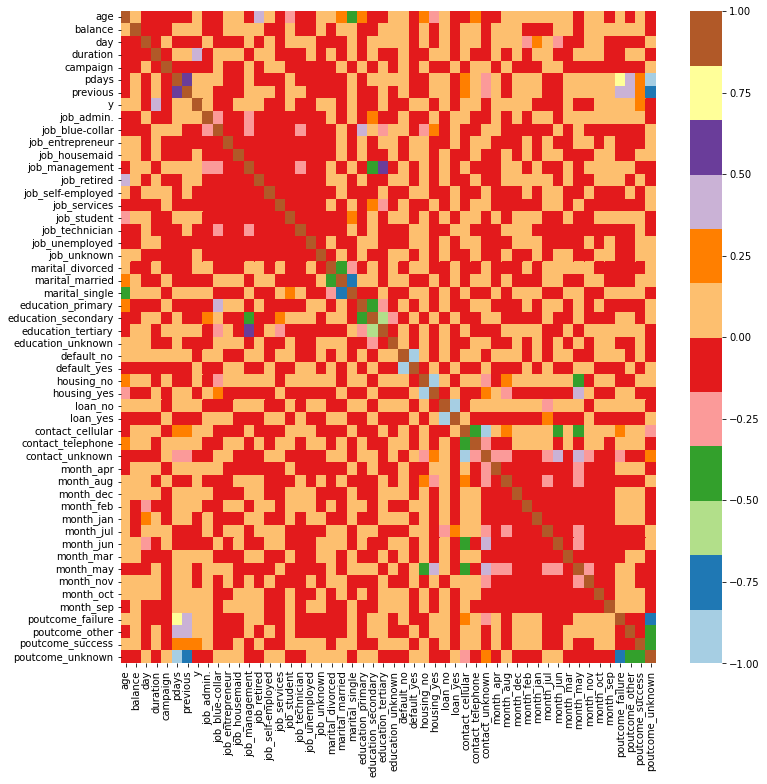

In [24]:
plt.figure(figsize=(12,12))
sns.heatmap(data_dummies.corr(), cmap="Paired")

by looking at the given heatmat we can say that poutcome_failure and pdays are highly correlated we will drop the poutcome_failure feature

In [25]:
# Remove column name ' poutcome_failure'
data_dummies=data_dummies.drop(['poutcome_failure'], axis=1)


In [26]:
data_dummies=data_dummies.drop(['day'], axis=1)

In [27]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   duration             4521 non-null   int64
 3   campaign             4521 non-null   int64
 4   pdays                4521 non-null   int64
 5   previous             4521 non-null   int64
 6   y                    4521 non-null   int64
 7   job_admin.           4521 non-null   uint8
 8   job_blue-collar      4521 non-null   uint8
 9   job_entrepreneur     4521 non-null   uint8
 10  job_housemaid        4521 non-null   uint8
 11  job_management       4521 non-null   uint8
 12  job_retired          4521 non-null   uint8
 13  job_self-employed    4521 non-null   uint8
 14  job_services         4521 non-null   uint8
 15  job_student          4521 non-null   uint8
 16  job_technician       452

In [28]:
new_df1_target0=df.loc[df["y"]==0]
new_df1_target1=df.loc[df["y"]==1]

In [29]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

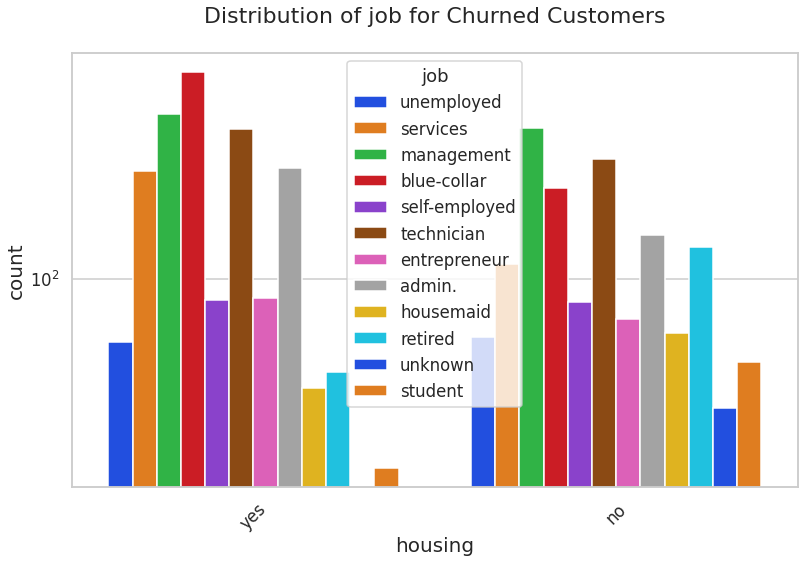

In [30]:
uniplot(new_df1_target0,col='housing',title='Distribution of job for Churned Customers',hue='job')

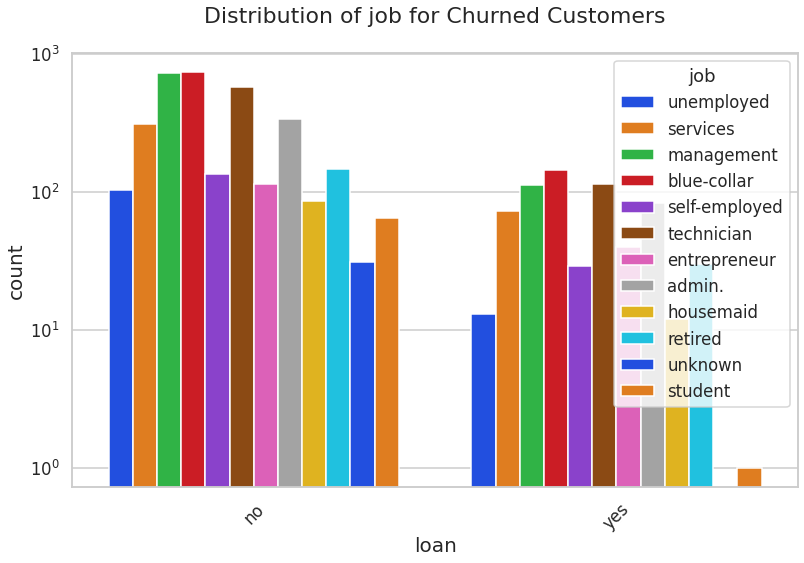

In [31]:
uniplot(new_df1_target0,col='loan',title='Distribution of job for Churned Customers',hue='job')

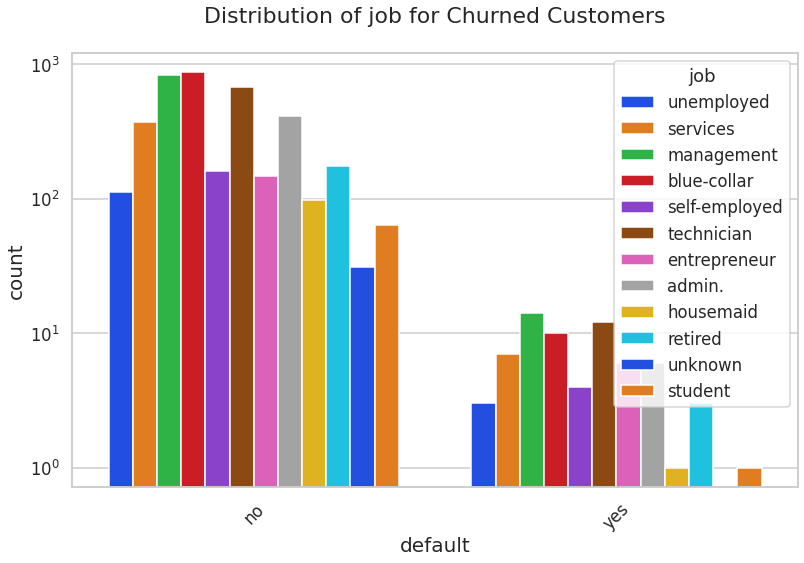

In [32]:
uniplot(new_df1_target0,col='default',title='Distribution of job for Churned Customers',hue='job')

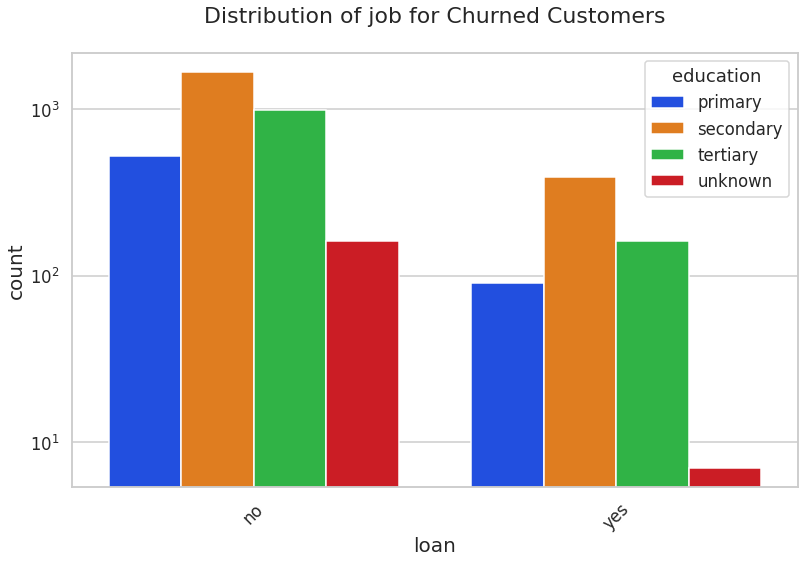

In [45]:
uniplot(new_df1_target0,col='loan',title='Distribution of job for Churned Customers',hue='education')

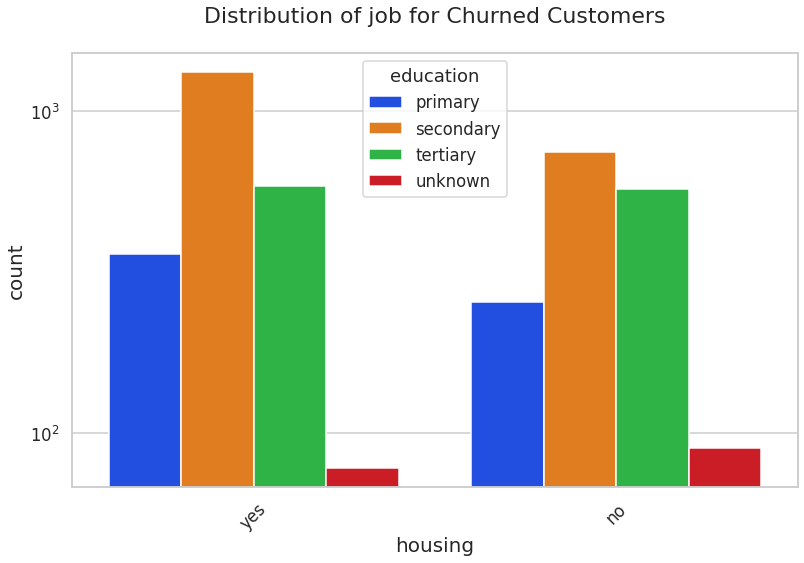

In [47]:
uniplot(new_df1_target0,col='housing',title='Distribution of job for Churned Customers',hue='education')

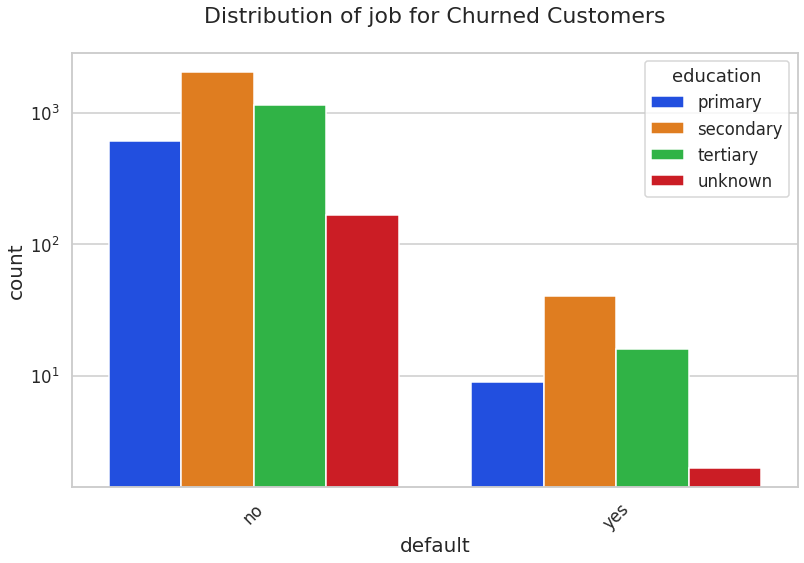

In [48]:
uniplot(new_df1_target0,col='default',title='Distribution of job for Churned Customers',hue='education')

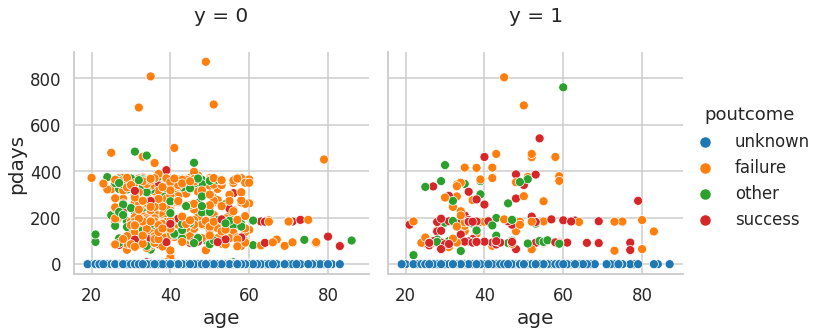

In [50]:
sns.relplot(data = df, x="age", y="pdays",hue= 'poutcome', col = 'y')

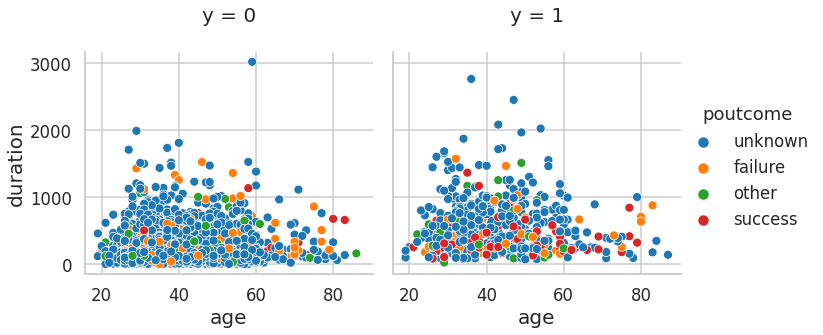

In [51]:
sns.relplot(data = df, x="age", y="duration",hue= 'poutcome', col = 'y')

In [33]:
data_dummies.to_csv('data.csv')